<a href="https://colab.research.google.com/github/robinofautumn/Local-codes-c-cpp/blob/main/Shivam_Singh_kmedoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_id = '1Qr6cOrZkPif8q9s0SNTZVUCZ5GHy1d3G'
link = f'https://drive.google.com/uc?id={file_id}'

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output

data = pd.read_csv(link)


In [16]:
# Step 2: Preprocessing
attributes_to_exclude = ['id', 'diagnosis']
data_for_clustering = data.drop(columns=attributes_to_exclude)


In [17]:
# Handle missing values (e.g., impute with mean)
normalized_data = (data_for_clustering - data_for_clustering.mean()) / data_for_clustering.std()
normalized_data.fillna(0, inplace=True)  # Replace NaN values with 0 or other appropriate values

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)


In [18]:

# Step 3: K-Medoid Clustering
def assign_points_to_clusters(data, medoids):
    distances = np.linalg.norm(data[:, np.newaxis, :] - medoids, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments



In [19]:
def compute_medoid_cost(data, cluster_indices):
    distances = np.linalg.norm(data[:, np.newaxis, :] - data[cluster_indices], axis=2)
    medoid_cost = np.sum(np.min(distances, axis=1))
    return medoid_cost



In [20]:
k = 2  # Number of clusters
max_iterations = 100

initial_medoid_indices = np.random.choice(len(normalized_data), size=k, replace=False)
medoids_indices = initial_medoid_indices

In [21]:
for iteration in range(max_iterations):
    cluster_assignments = assign_points_to_clusters(normalized_data.values, normalized_data.values[medoids_indices])

    new_medoids_indices = []
    for cluster_id in range(k):
        cluster_data_indices = np.where(cluster_assignments == cluster_id)[0]

        if len(cluster_data_indices) == 0:
            new_medoids_indices.append(medoids_indices[cluster_id])
            continue

        cluster_medoid_cost = compute_medoid_cost(normalized_data.values, cluster_data_indices)

        for data_index in cluster_data_indices:
            temp_medoids_indices = medoids_indices.copy()
            temp_medoids_indices[cluster_id] = data_index
            temp_medoid_cost = compute_medoid_cost(normalized_data.values, temp_medoids_indices)

            if temp_medoid_cost < cluster_medoid_cost:
                cluster_medoid_cost = temp_medoid_cost
                new_medoids_indices = temp_medoids_indices

        if len(new_medoids_indices) == 0:
            new_medoids_indices.append(medoids_indices[cluster_id])
        else:
            new_medoids_indices.append(medoids_indices[cluster_id])

    if np.array_equal(medoids_indices, new_medoids_indices):
        break

    medoids_indices = new_medoids_indices

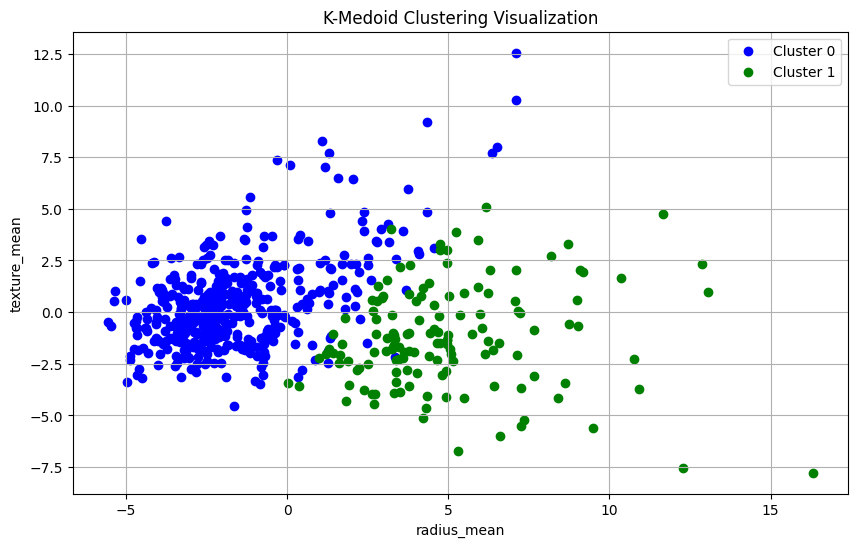

In [22]:
# Step 4: Plot Clusters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize=(10, 6))
for cluster_id in range(k):
    cluster_data = pca_result[cluster_assignments == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_id], label=f'Cluster {cluster_id}')

plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('K-Medoid Clustering Visualization')
plt.legend()
plt.grid()
plt.show()

In [23]:
# Step 5: Count Points in Each Cluster
unique_clusters, counts = np.unique(cluster_assignments, return_counts=True)
for cluster_id, count in zip(unique_clusters, counts):
    print(f'Cluster {cluster_id}: {count} points')


Cluster 0: 430 points
Cluster 1: 139 points
